# Decomposition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=0.3, size=x.size)

## Intuition: factorization
Why is it useful to express something as a few parts multiplied together?
To convey more information 

In [2]:
# at what points does y=0?
# y = -x**3 + 7*x**2 - 14*x + 8
y = (4-x) * (2-x) * (1-x)
#x = independant
# y = dep

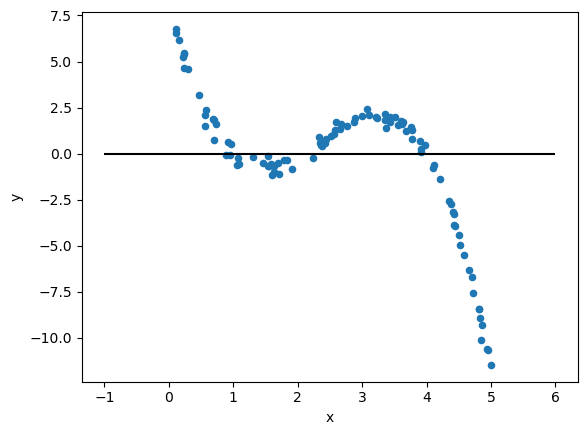

In [3]:
pd.DataFrame({"x": x, "y": y+noise}).plot.scatter(x="x", y="y")
plt.hlines(0, -1, 6, color="k")

## Some cool dimensionality reduction examples:
https://pair-code.github.io/understanding-umap/ \
https://distill.pub/2016/misread-tsne/ 

# Matrix Multiplication

In [4]:
A = np.random.normal(size=(9, 7))
B = np.random.normal(size=(7, 14))
C = np.random.normal(size=(14, 3))
D = np.random.normal(size=(3, 10))

In [5]:
print(A.shape, B.shape, C.shape, D.shape)

(9, 7) (7, 14) (14, 3) (3, 10)


In [6]:
# 1. The matrix multiplication is possible when the second & first sizes of consecutive matrices match
# 2. size of the final: row of the first matrix, and column of the last
(A @ B @ C @ D).shape

(9, 10)

Question: Is it possible to use fewer columns to represent this dataframe?

In [7]:
df = pd.DataFrame(make_blobs(centers=2, random_state=320)[0], columns=["A", "B"])
df["C"] = df["A"] * 2
df["D"] = df["A"] - df["B"]
df.head()

A         B          C          D
0  11.109262 -0.189146  22.218523  11.298408
1   9.821109 -2.902324  19.642217  12.723432
2  10.169915 -2.745896  20.339830  12.915812
3   8.511018 -3.654349  17.022037  12.165367
4   6.449035 -4.901184  12.898070  11.350219

A: Yes. C is two times of A and D is A - B, so we only need A & B and their relationship to C & D to represent the dataframe.

## Decomposition with Principal Component Analysis (PCA)

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

```python
from sklearn.decomposition import PCA
```

In [8]:
p = PCA()
W = p.fit_transform(df)
C = p.components_
m = p.mean_

In [9]:
W.shape

(100, 4)

In [10]:
# W @ C

In [11]:
C.shape

(4, 4)

In [12]:
df.head()

A         B          C          D
0  11.109262 -0.189146  22.218523  11.298408
1   9.821109 -2.902324  19.642217  12.723432
2  10.169915 -2.745896  20.339830  12.915812
3   8.511018 -3.654349  17.022037  12.165367
4   6.449035 -4.901184  12.898070  11.350219

In [13]:
# Attempt to use W and C to reconstruct the original dataframe
pd.DataFrame(W @ C).head()

0         1         2         3
0  4.041159  3.228656  8.082318  0.812503
1  2.753006  0.515479  5.506012  2.237527
2  3.101813  0.671906  6.203625  2.429907
3  1.442916 -0.236547  2.885831  1.679462
4 -0.619068 -1.483381 -1.238135  0.864314

In [14]:
# PCA will first find the mean
m = p.mean_
print(m.shape)
print(m)

(4,)
[ 7.06810262 -3.41780245 14.13620523 10.48590507]


In [15]:
df.mean()

A     7.068103
B    -3.417802
C    14.136205
D    10.485905
dtype: float64

In [16]:
# use W and C to reconstruct the original dataframe
pd.DataFrame((W @ C) + m).head()

0         1          2          3
0  11.109262 -0.189146  22.218523  11.298408
1   9.821109 -2.902324  19.642217  12.723432
2  10.169915 -2.745896  20.339830  12.915812
3   8.511018 -3.654349  17.022037  12.165367
4   6.449035 -4.901184  12.898070  11.350219

In [17]:
df.head()

A         B          C          D
0  11.109262 -0.189146  22.218523  11.298408
1   9.821109 -2.902324  19.642217  12.723432
2  10.169915 -2.745896  20.339830  12.915812
3   8.511018 -3.654349  17.022037  12.165367
4   6.449035 -4.901184  12.898070  11.350219

C is called the **component matrix** \
first row of C is the most important component \
second row of C is the second most important component \
and so on ...

Each row is in the form of the slope of the componenet

In [18]:
# two components for 2d data
C

array([[ 0.42622954,  0.19303913,  0.85245909,  0.23319042],
       [-0.01210607, -0.71287477, -0.02421214,  0.7007687 ],
       [-0.25394066,  0.66807115, -0.20706525,  0.66807115],
       [-0.86815664, -0.09069946,  0.47942805, -0.09069946]])

For the first component, PCA will try to fit a line that corss the mean point and 
has the largest spreadout in terms of points. \
The second component will be prependicular to the first component, corssing the mean point, 
and has the largest spreadout in its direction. 

First column of W represents relative positions of points along the first component \
Second column of W represents relative positions of points along the second component \
and so on ...

In [19]:
print(W.shape, C.shape)

(100, 4) (4, 4)


In [20]:
# us the first two components to reconstruct the dataframe
pd.DataFrame(W[:, :2] @ C[:2, :] + m).head()

0         1          2          3
0  11.109262 -0.189146  22.218523  11.298408
1   9.821109 -2.902324  19.642217  12.723432
2  10.169915 -2.745896  20.339830  12.915812
3   8.511018 -3.654349  17.022037  12.165367
4   6.449035 -4.901184  12.898070  11.350219

In [21]:
df.head()

A         B          C          D
0  11.109262 -0.189146  22.218523  11.298408
1   9.821109 -2.902324  19.642217  12.723432
2  10.169915 -2.745896  20.339830  12.915812
3   8.511018 -3.654349  17.022037  12.165367
4   6.449035 -4.901184  12.898070  11.350219

In [22]:
# use only the first component to approximately reconstruct the dataframe
# the first column of W (relative position of W along the first component) multiply the first row of C (the first component)
pd.DataFrame(W[:, :1] @ C[:1, :] + p.mean_).head()

0         1          2          3
0  11.085330 -1.598403  22.170659  12.683732
1   9.833625 -2.165299  19.667250  11.998924
2  10.182458 -2.007313  20.364916  12.189771
3   8.526250 -2.757408  17.052500  11.283658
4   6.469623 -3.688854  12.939246  10.158476

## Explained Variance
 * Let's check how close the above dataframe to the orginal dataframe

In [23]:
a = np.array([1.1, 1.9, 3.2])
a

array([1.1, 1.9, 3.2])

In [24]:
b = np.array([1, 2, 3])
b

array([1, 2, 3])

In [25]:
a - b

array([ 0.1, -0.1,  0.2])

In [26]:
before = a.var()

In [27]:
after = (a - b).var()

In [28]:
improvement = (before - after)/before
improvement

0.9792284866468843

In [29]:
1 - (a - b).var() / a.var()

0.9792284866468842

In [30]:
# the amount of variance explained by each components
# the first component has largest explained variance ration
# the second component has the second largest explained variance ratio
# and so on 
explained_variance = p.explained_variance_.round(2)
explained_variance

array([52.69,  2.2 ,  0.  ,  0.  ])

In [31]:
(explained_variance / explained_variance.sum()).round(2)

array([0.96, 0.04, 0.  , 0.  ])

In [32]:
# explained variance percentage wise
p.explained_variance_ratio_.round(2)

array([0.96, 0.04, 0.  , 0.  ])

### Cumulative plot of explained variance ratio

Text(0.5, 0, 'Number of Components')

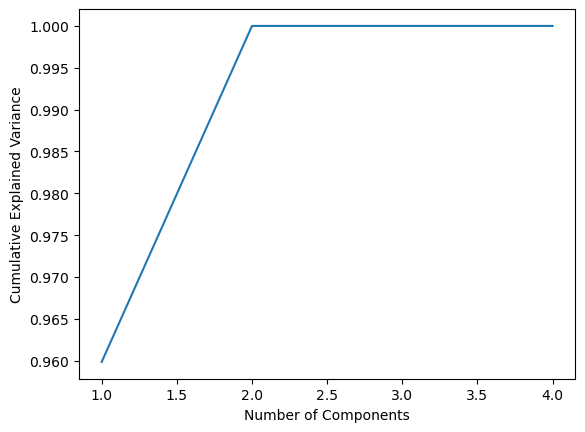

In [33]:
# cumsum() compute the cumulative sum
s = pd.Series(p.explained_variance_ratio_.cumsum(), index=range(1,5))
ax = s.plot.line()
ax.set_ylabel("Cumulative Explained Variance")
ax.set_xlabel("Number of Components")

Text(0.5, 0, 'Number of Components')

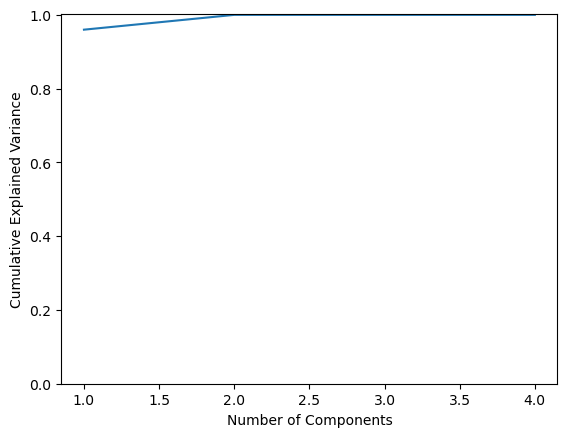

In [34]:
# cumsum() compute the cumulative sum
s = pd.Series(p.explained_variance_ratio_.cumsum(), index=range(1,5))
ax = s.plot.line(ylim=0)
ax.set_ylabel("Cumulative Explained Variance")
ax.set_xlabel("Number of Components")

# Dimensionality Reduction on Feature Columns

In [35]:
# use the W columns for machine leearning and visualization, because this tells
# us a lot about the original 4 columns
pd.DataFrame(W).head()

0         1             2             3
0  9.425032 -1.976864  2.376813e-15  6.066968e-15
1  6.488340  1.033877  2.902658e-15 -3.513320e-16
2  7.306756  1.036064  5.765440e-16 -1.455095e-16
3  3.421038  1.258202  1.171580e-15 -6.413705e-17
4 -1.404125  1.700622  9.342342e-16 -4.536823e-17

In [36]:
# pass an int to say how many weight columns and component rows we want to slice out
p = PCA(2)
W = p.fit_transform(df)
C = p.components_
m = p.mean_

In [37]:
W

array([[ 9.42503159e+00, -1.97686375e+00],
       [ 6.48834002e+00,  1.03387703e+00],
       [ 7.30675581e+00,  1.03606377e+00],
       [ 3.42103831e+00,  1.25820247e+00],
       [-1.40412545e+00,  1.70062168e+00],
       [-8.30581803e+00,  2.63423664e+00],
       [-3.24943617e+00,  1.83783997e+00],
       [ 2.66616658e+00, -1.08452160e+00],
       [-2.51842005e+00, -9.30814213e-01],
       [ 4.63377947e+00, -1.08210979e+00],
       [-1.06011492e+01,  5.36109167e-01],
       [-7.82767314e+00, -2.53606667e-01],
       [-6.75073959e+00, -7.40408437e-01],
       [-8.69935545e+00, -3.12229569e+00],
       [-7.75957654e+00,  1.97169017e+00],
       [ 8.09155384e+00, -4.61609614e-01],
       [-3.92432218e+00,  2.64274842e+00],
       [ 1.34533771e+01,  1.50937447e+00],
       [-1.23609532e+01, -2.04689199e+00],
       [-7.35945072e+00, -2.66740910e+00],
       [-6.00397446e+00, -6.81070185e-01],
       [ 6.94750111e+00,  1.59323124e+00],
       [ 3.29133705e+00, -1.77425121e+00],
       [-7.

In [38]:
print(W.shape, C.shape)

(100, 2) (2, 4)


In [39]:
# pass a float to indicate how much variance we want to explain (explained_variance_ratio_}
p = PCA(0.96)
W = p.fit_transform(df)
C = p.components_
m = p.mean_

In [40]:
print(W.shape, C.shape)

(100, 2) (2, 4)


In [41]:
df

A         B          C          D
0   11.109262 -0.189146  22.218523  11.298408
1    9.821109 -2.902324  19.642217  12.723432
2   10.169915 -2.745896  20.339830  12.915812
3    8.511018 -3.654349  17.022037  12.165367
4    6.449035 -4.901184  12.898070  11.350219
..        ...       ...        ...        ...
95   5.678593 -4.296015  11.357186   9.974608
96  12.209441  0.161646  24.418881  12.047794
97   5.523698 -7.321892  11.047396  12.845590
98   4.525065 -4.957787   9.050130   9.482852
99   4.934732 -3.554432   9.869464   8.489163

[100 rows x 4 columns]

In [42]:
pipe = Pipeline([
    ("pca", PCA(2)), 
    ("km", KMeans(3)),
])

# pipe.fit_transform(df) # fit PCA, transform using PCA, fit KMeans using output from PCA

groups = pipe.fit_predict(df)
groups

array([1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2,
       0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0], dtype=int32)

In [43]:
# pipe["pca"].transform(df)

<AxesSubplot:xlabel='0', ylabel='1'>

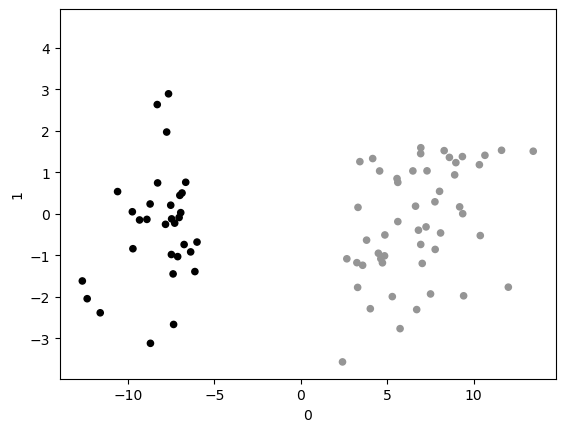

In [44]:
pd.DataFrame(pipe["pca"].transform(df)).plot.scatter(x=0, y=1, c=groups)

# Lossy Compression

Use PCA to extract the most important information and throw away the less important ones

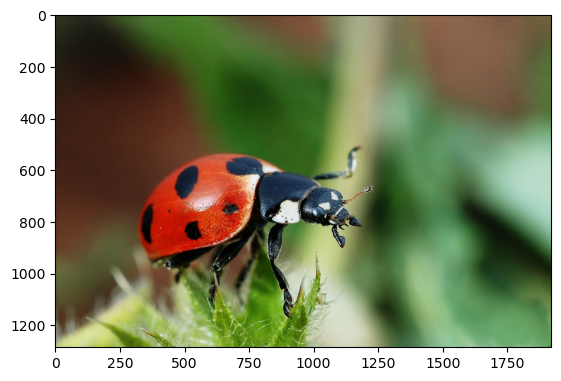

In [45]:
img = plt.imread("bug.jpg")
plt.imshow(img)

In [46]:
type(img)

numpy.ndarray

In [47]:
img.shape

(1286, 1920, 3)

In [48]:
# averaging the color dimension to make it a bit more easy to handle
img = img.mean(axis=2)
img.shape

(1286, 1920)

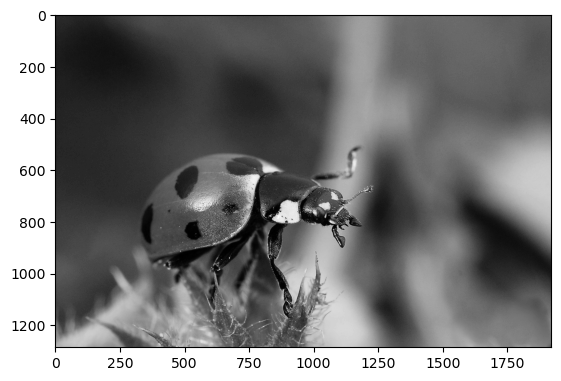

In [49]:
plt.imshow(img, cmap="gray")

In [50]:
# img

In [51]:
# we want to explian 95% of the variance
p = PCA(0.95)
W = p.fit_transform(img)
C = p.components_
m = p.mean_

In [52]:
original_size = len(img.reshape(-1))
original_size

2469120

In [53]:
compressed_size = len(W.reshape(-1)) + len(C.reshape(-1)) + len(m.reshape(-1))
compressed_size

120542

In [54]:
# compression ratio
original_size / compressed_size

20.483482935408407

In [55]:
C.shape

(37, 1920)

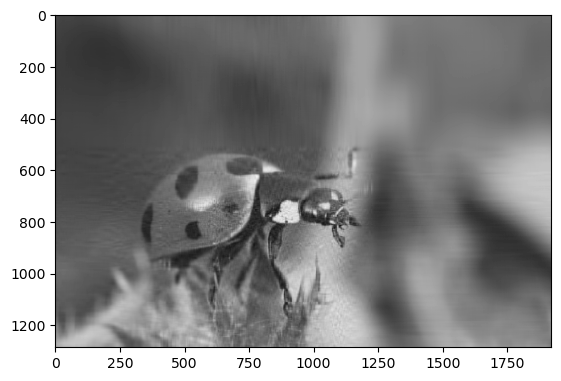

In [56]:
plt.imshow(W @ C + m, cmap="gray")

In [57]:
# saves numpy arrays into .npz format
# use wb to write in binary format
with open("img1.npz", "wb") as f: 
    np.savez(f, img)

In [58]:
with open("img2.npz", "wb") as f: 
    np.savez(f, W, C, m)

In [59]:
with np.load("img2.npz") as f: 
    W, C, m = f.values()

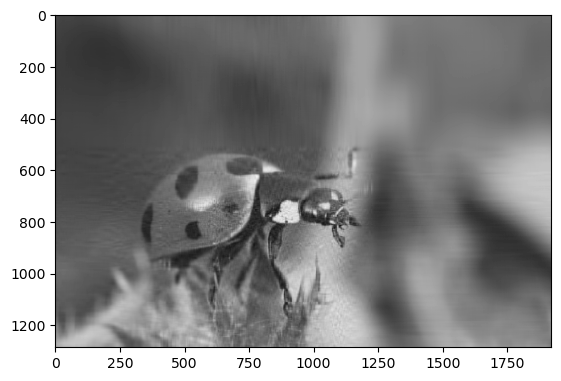

In [60]:
plt.imshow(W @ C + m, cmap="gray")

In [61]:
# original plot size vs the compressed plot size
!ls -lh

total 22M
-rw-rw-r-- 1 gurmail.singh gurmail.singh 932K Apr 26 05:03 24-pca.ipynb
-rw-rw-r-- 1 gurmail.singh gurmail.singh  18K Apr 25 18:32 24-pca_001.ipynb
-rw-rw-r-- 1 gurmail.singh gurmail.singh  18K Apr 25 18:32 24-pca_002.ipynb
-rw-rw-r-- 1 gurmail.singh gurmail.singh 285K Apr 25 18:32 bug.jpg
-rw-rw-r-- 1 gurmail.singh gurmail.singh  19M Apr 26 05:04 img1.npz
-rw-rw-r-- 1 gurmail.singh gurmail.singh 943K Apr 26 05:04 img2.npz
-rw-rw-r-- 1 gurmail.singh gurmail.singh 156K Apr 25 18:33 starter.ipynb
